In [2]:
import networkx as nx
import matplotlib as plt
import numpy as np

## 11. Generacion de grafos

## 11.1. Grafos sintéticos
Los grafos sintéticos son grafos generados de forma artificial, es decir, no representan una base de datos real. Se utilizan para realizar pruebas y experimentos.
### 11.1.1. Grafos aleatorios
Los grafos aleatorios son grafos generados de forma aleatoria. Existen diferentes modelos de generación de grafos aleatorios, entre los que destacan:

#### 11.1.1.1. Modelo Erdos-Renyi 
Este modelo genera grafos aleatorios con un número fijo de nodos y una probabilidad fija de que exista una arista entre dos nodos. Para generar un grafo aleatorio con este modelo se utiliza la función `erdos_renyi_graph`.  En la función tendremos como parámetros el número de nodos y la probabilidad de que exista una arista entre dos nodos.

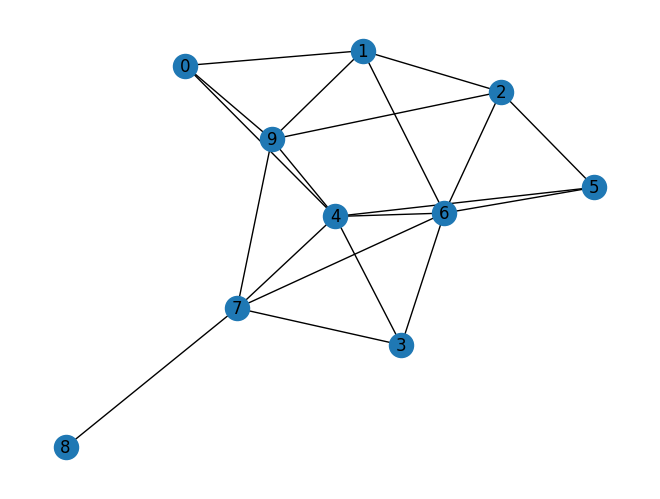

In [3]:
G = nx.erdos_renyi_graph(10, 0.4, seed=1) # 10 nodos, probabilidad de 0.4
nx.draw(G, with_labels=True)

#### 11.1.1.2. Modelo Barabasi-Albert
Este modelo genera grafos aleatorios con un número fijo de nodos y un número fijo de aristas que se añaden en cada paso. Para generar un grafo aleatorio con este modelo se utiliza la funcion `barabasi_albert_graph`.  En la función tendremos como parámetros el número de nodos y el número de aristas que se añaden en cada paso.

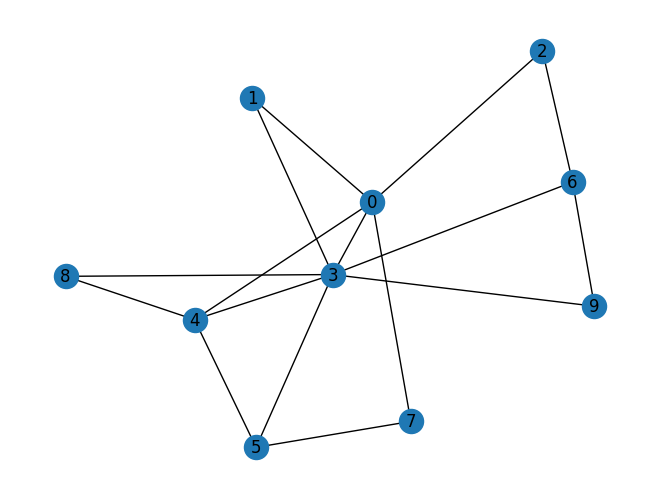

In [4]:
G = nx.barabasi_albert_graph(10, 2, seed=1) # 10 nodos, 2 aristas por paso
nx.draw(G, with_labels=True)

### 11.1.2. Grafo Small World o modelo de Watts-Strogatz 
Este modelo genera grafos aleatorios con un número fijo de nodos y un número fijo de aristas que se añaden en cada paso. Para generar un grafo aleatorio con este modelo se utiliza la función `watts_strogatz_graph`. En la función tendremos como parámetros el número de nodos, el número de aristas que se añaden en cada paso y la probabilidad de que se añada una arista entre dos nodos que no estén conectados.

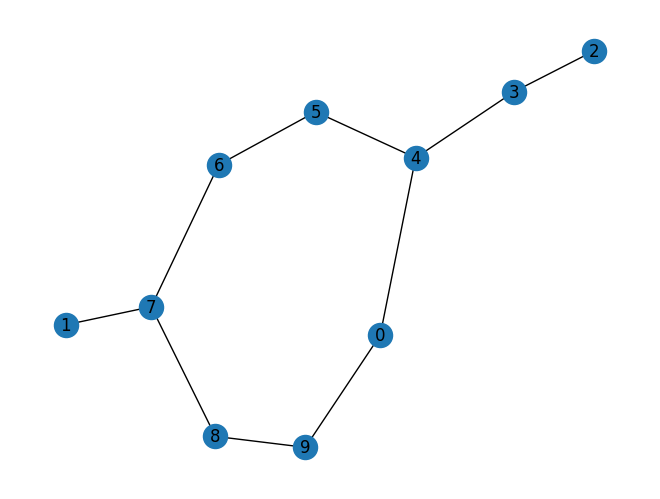

In [5]:
G = nx.watts_strogatz_graph(10, 2, 0.2, seed=1) # 10 nodos, 2 aristas por paso, probabilidad de 0.2
nx.draw(G, with_labels=True)

### 11.1.3. Grafo arbol 
Un arbol es un grafo sin ciclos. Para generar un arbol se utiliza la función `random_tree`. En la función tendremos como parámetro el número de nodos.

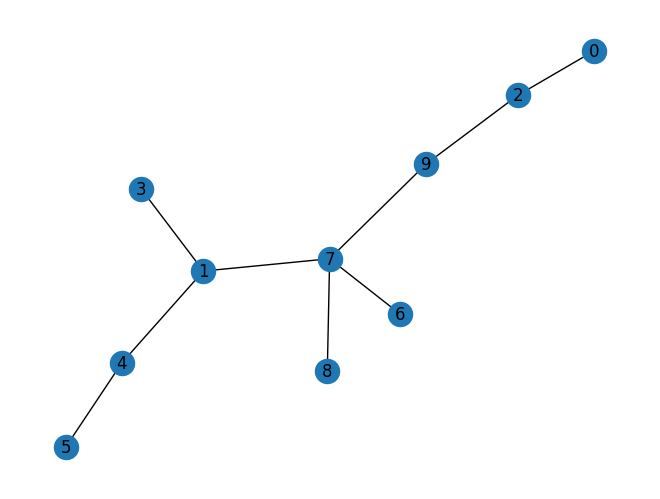

In [6]:
G = nx.random_tree(10, seed=1) # 10 nodos
nx.draw(G, with_labels=True)

### 11.1.4. Modelo Stochastic Block
Este modelo genera grafos aleatorios con un número fijo de nodos y un número fijo de bloques y utiliza estas comunidades donde se encontraran los nodos más conectados entre sí. Para generar un grafo aleatorio con este modelo se utiliza la función `stochastic_block_model`. En la función tendremos como parámetros el número de nodos y una lista con el número de nodos de cada bloque.

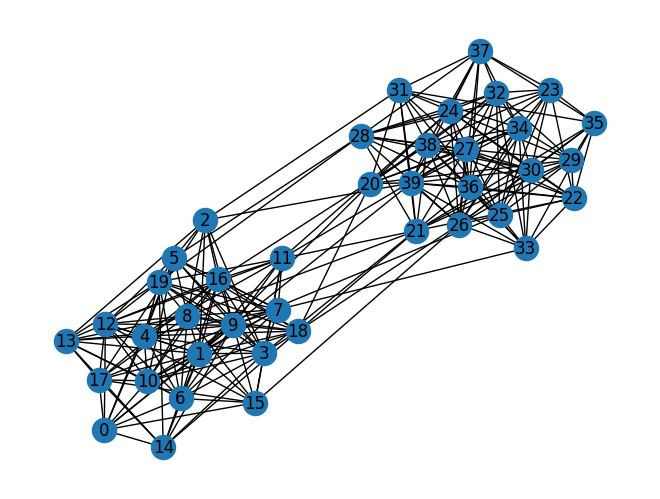

In [7]:
G = nx.stochastic_block_model([20, 20], [[0.6, 0.05], [0.05, 0.6]], seed=1) # 20 nodos por cada bloque, 2 bloques y probabilidades de 0.6 de conexion en el mismo bloque y 0.05 entre bloques diferentes, de esta manera se crean dos comunidades que podemos ver claramente en el grafo
nx.draw(G, with_labels=True)

## 11.2. Propiedades de los grafos
- **número de nodos y aristas:** `G.number_of_nodes()`, `G.number_of_edges()` para obtener el número de nodos y aristas de un grafo.  

- **Esta conectado:** `nx.is_connected(G)` para comprobar si un grafo esta conectado entre todos sus nodos. Ya que podría haber nodos que no estén conectados con el resto.  
  
- **Es cíclico:** `nx.is_directed_acyclic_graph(G)` para comprobar si un grafo no contiene ciclos.
- **Radio y diámetro:** `nx.radius(G)`, `nx.diameter(G)` para obtener el radio y el diámetro de un grafo. El radio es la menor distancia entre los nodos mas alejados y el diametro es la mayor distancia entre los nodos más alejados.  
  
- **Grado de un nodo:** `G.degree(nodo)` para obtener el grado de un nodo, es decir, el número de aristas que conectan con el y `nx.average_degree_connectivity(G)` para obtener el grado medio de los nodos.  
  
- **Distribución de grado:** `nx.degree_histogram(G)` para obtener la distribución de grado de un grafo.  
  
- **Media de los caminos más cortos:** `nx.average_shortest_path_length(G)` para obtener la media de los caminos mas cortos entre todos los nodos.  

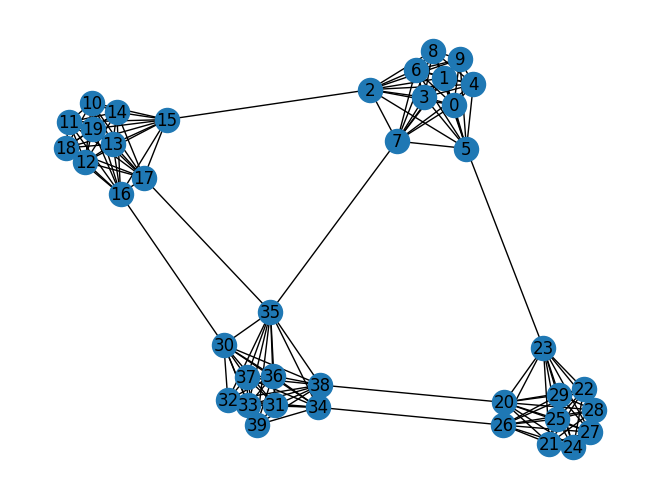

In [8]:
Ex21 = nx.stochastic_block_model([10, 10, 10, 10], [[1, 0.005,0.005, 0.005], [0.005, 1 ,0.005, 0.005],[0.005,0.005 ,1, 0.005],[0.005, 0.005,0.005, 1]], seed=8) 

pos = nx.spring_layout(Ex21,seed=8)
nx.draw(Ex21,pos, with_labels=True)

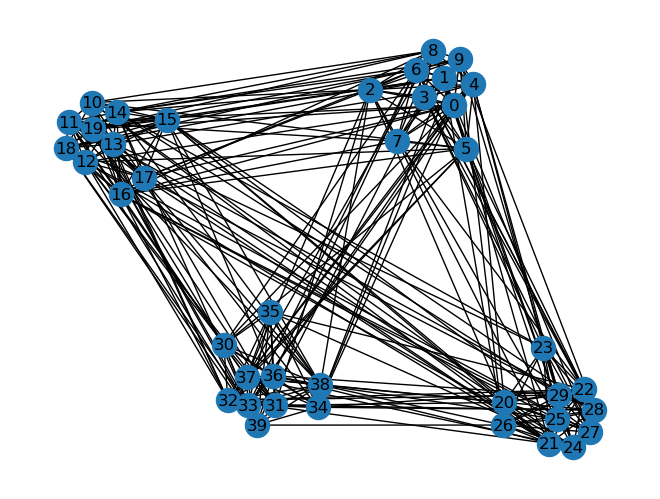

In [23]:
Ex22 = nx.stochastic_block_model([10, 10, 10, 10], [[1, 0.2, 0.2, 0.2], [0.2, 1, 0.2, 0.2],[0.2, 0.2, 1, 0.2],[0.2, 0.2, 0.2, 1]], seed=1) 
nx.draw(Ex22, pos, with_labels=True)

Está claro que en el primer grafo podemos ver más claramente que existen 4 bloques de nodos donde no hay casi conexión entre los distintos bloques, sin embargo, en el segundo grafo vemos que los bloques están mucho más interconectectados y cualquier información llegará antes a otro bloque que en el primer grafo.
Si los bloques fueran comunidades de personas reales podríamos asimilar que en el primer grafo hay 4 comunidades de personas y para relacionarse con otras comunidades la información la lleva un unico lento mensajero, sin embargo, en el segundo grafo podríamos decir que bastantes personas de una comunidad son capaces de relacionarse con personas de otras comunidades y la información llega mucho más rápido


## Ejercicio 3

In [17]:
def info_graf(gf):

    print('Number of Nodes and Edges:', gf.number_of_nodes(), 'nodes,', gf.number_of_edges(), 'edges')

    print('Is Connected:', nx.is_connected(gf))

    print('Does Not Have Cycles:', nx.is_directed_acyclic_graph(gf)) 

    try:
        print('Radius and Diameter:', nx.radius(gf), 'radius,', nx.diameter(gf), 'diameter')
    except:
        print('Graph is not connected (no radius or diameter)')
    
    print('Average Degree', nx.average_degree_connectivity(gf))

    print('Degree Distribution: ', nx.degree_histogram(gf))

    try:
        print('Average Shortest Path Length', nx.average_shortest_path_length(gf))
    except:
        print('Graph is not connected (no average shortest path length)')


print('Graph 2.1 \n')
info_graf(Ex21)
print('\n\nGraph 2.2 \n')
info_graf(Ex22)

Graph 2.1 

Number of Nodes and Edges: 40 nodes, 187 edges
Is Connected: True
Does Not Have Cycles: False
Radius and Diameter: 3 radius, 5 diameter
Average Degree {9: 9.382716049382717, 10: 9.366666666666667, 11: 9.454545454545455}
Degree Distribution:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 27, 12, 1]
Average Shortest Path Length 2.5474358974358973


Graph 2.2 

Number of Nodes and Edges: 40 nodes, 415 edges
Is Connected: True
Does Not Have Cycles: False
Radius and Diameter: 2 radius, 2 diameter
Average Degree {24: 21.041666666666668, 22: 20.78787878787879, 19: 21.157894736842106, 23: 21.184782608695652, 18: 21.194444444444443, 21: 21.035714285714285, 17: 21.08823529411765, 25: 21.28, 20: 20.8125, 15: 20.466666666666665}
Degree Distribution:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 4, 7, 4, 4, 9, 4, 3, 2]
Average Shortest Path Length 1.4679487179487178


Hitting Time: 9.885


''